In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

In [33]:
train_data = pd.read_csv('Data/mnist_train_small.csv')
test_data = pd.read_csv('Data/mnist_test.csv')

# EDA

In [34]:
train_data.

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Classification (Digit)



In [35]:
y_train = train_data['6']
y_train.columns = ['label']
y_test = test_data['7']
y_test.columns = ['label']
X_train = train_data.drop(columns = ['6'])
X_test = test_data.drop(columns = ['7'])

feature_names = []
for i in range(len(X_train.columns)):
    feature_names.append(i)

X_train.columns = feature_names
X_test.columns = feature_names  

numerical_features = feature_names

DecisionTreeClassifier Train score: 1.0
DecisionTreeClassifier Train Classification Report
precision {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
recall {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
f1 {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


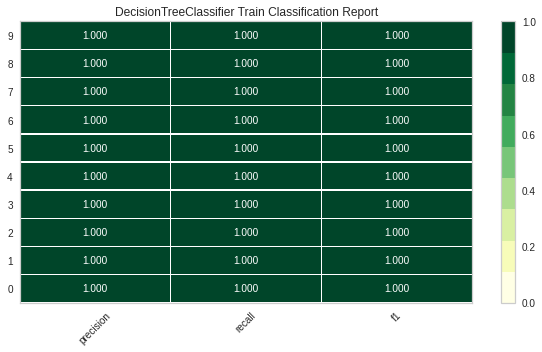

DecisionTreeClassifier Test score: 0.8447844784478448
DecisionTreeClassifier Test Classification Report
precision {0: 0.9065989847715736, 1: 0.9214840379637619, 2: 0.8137254901960784, 3: 0.8060301507537688, 4: 0.859358841778697, 5: 0.7694013303769401, 6: 0.8757961783439491, 7: 0.8708452041785375, 8: 0.7821989528795812, 9: 0.8227228207639569}
recall {0: 0.9112244897959184, 1: 0.9409691629955947, 2: 0.8042635658914729, 3: 0.7940594059405941, 4: 0.8462321792260692, 5: 0.7780269058295964, 6: 0.8611691022964509, 7: 0.8928919182083739, 8: 0.7669404517453798, 9: 0.8325074331020813}
f1 {0: 0.9089058524173028, 1: 0.931124673060157, 2: 0.8089668615984406, 3: 0.8, 4: 0.8527449974345819, 5: 0.7736900780379041, 6: 0.8684210526315791, 7: 0.8817307692307692, 8: 0.7744945567651633, 9: 0.8275862068965517}


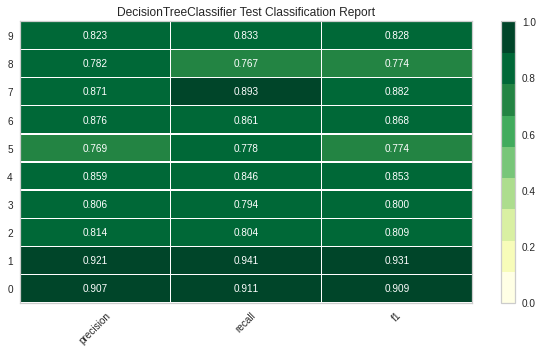

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



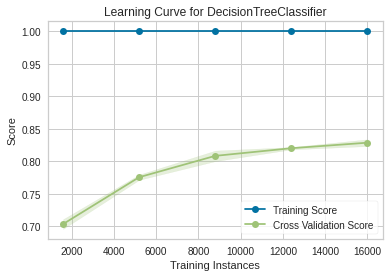

DecisionTreeClassifier Train score: 0.9961998099904995
DecisionTreeClassifier Train Classification Report
precision {0: 1.0, 1: 0.9951154529307282, 2: 1.0, 3: 0.9995034756703078, 4: 0.9896319336443753, 5: 0.9994318181818181, 6: 1.0, 7: 0.9920597851471276, 8: 0.9979013641133263, 9: 0.9890927119484383}
recall {0: 1.0, 1: 0.9991083370485956, 2: 0.9959778783308195, 3: 0.9960415635823849, 4: 0.9922037422037422, 5: 0.9988642816581488, 6: 0.9995093228655545, 7: 0.9990592662276576, 8: 0.9947698744769874, 9: 0.986159169550173}
f1 {0: 1.0, 1: 0.9971078976640712, 2: 0.9979848866498741, 3: 0.9977695167286245, 4: 0.9909161692187906, 5: 0.9991479693268958, 6: 0.9997546012269939, 7: 0.9955472228732132, 8: 0.9963331587218438, 9: 0.9876237623762376}


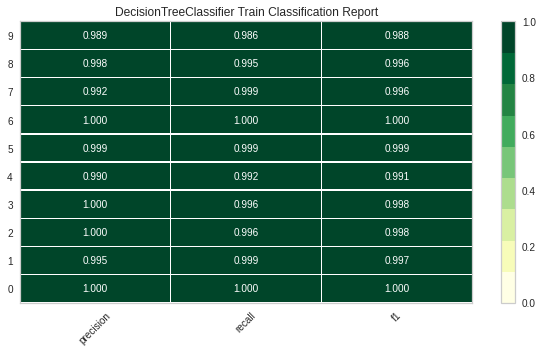

DecisionTreeClassifier Test score: 0.8446844684468446
DecisionTreeClassifier Test Classification Report
precision {0: 0.9003021148036254, 1: 0.9221453287197232, 2: 0.8132411067193676, 3: 0.8055555555555556, 4: 0.8555211558307534, 5: 0.7827547592385219, 6: 0.8734309623430963, 7: 0.8703527168732126, 8: 0.7790821771611526, 9: 0.8235867446393762}
recall {0: 0.9122448979591836, 1: 0.9392070484581497, 2: 0.7974806201550387, 3: 0.803960396039604, 4: 0.8441955193482689, 5: 0.7836322869955157, 6: 0.8716075156576201, 7: 0.8889970788704966, 8: 0.7494866529774127, 9: 0.8374628344895937}
f1 {0: 0.9062341611758744, 1: 0.930597992143169, 2: 0.8052837573385518, 3: 0.804757185332012, 4: 0.849820604818042, 5: 0.7831932773109244, 6: 0.8725182863113897, 7: 0.8795761078998073, 8: 0.7639979068550496, 9: 0.8304668304668305}


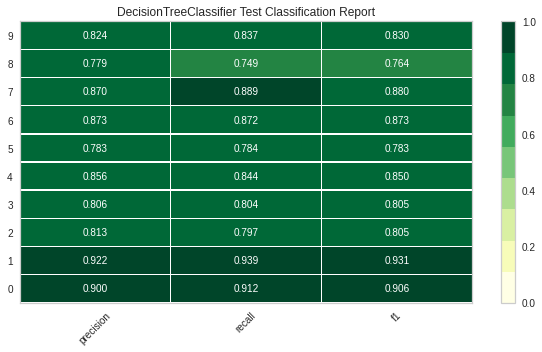

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



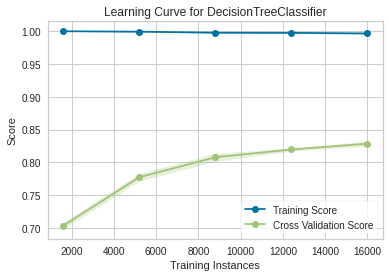

MLPClassifier Train score: 0.99989999499975
MLPClassifier Train Classification Report
precision {0: 1.0, 1: 1.0, 2: 1.0, 3: 0.9990113692535838, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
recall {0: 0.9994903160040775, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0.9994321408290744, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
f1 {0: 0.9997450930410401, 1: 1.0, 2: 1.0, 3: 0.9995054401582592, 4: 1.0, 5: 0.999715989775632, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


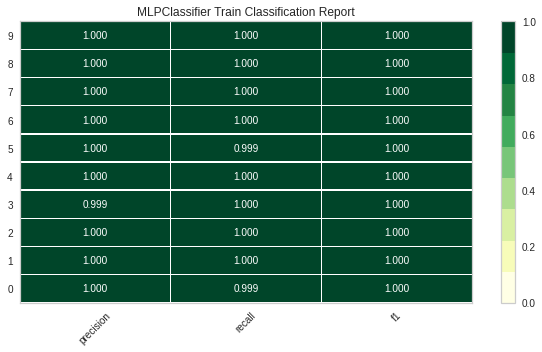

MLPClassifier Test score: 0.9231923192319232
MLPClassifier Test Classification Report
precision {0: 0.9515151515151515, 1: 0.9641921397379912, 2: 0.9164208456243854, 3: 0.9017857142857143, 4: 0.9283520982599796, 5: 0.890625, 6: 0.9313524590163934, 7: 0.9306640625, 8: 0.8943514644351465, 9: 0.9128712871287129}
recall {0: 0.9612244897959183, 1: 0.9726872246696036, 2: 0.9031007751937985, 3: 0.9, 4: 0.9236252545824847, 5: 0.8946188340807175, 6: 0.9488517745302714, 7: 0.9279454722492697, 8: 0.87782340862423, 9: 0.9137760158572844}
f1 {0: 0.9563451776649747, 1: 0.968421052631579, 2: 0.9097120546608102, 3: 0.9008919722497523, 4: 0.9259826442062276, 5: 0.8926174496644295, 6: 0.9400206825232679, 7: 0.9293027791321307, 8: 0.8860103626943006, 9: 0.9133234274393265}


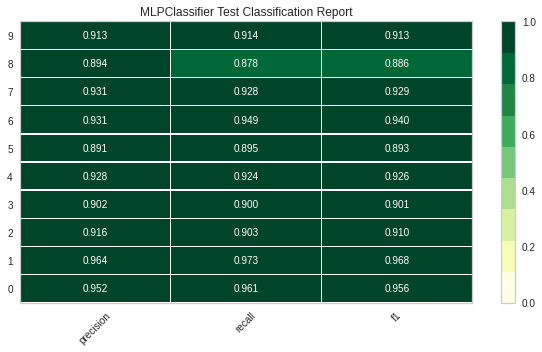

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



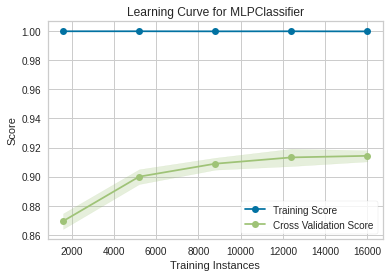

AdaBoostClassifier Train score: 0.7534876743837192
AdaBoostClassifier Train Classification Report
precision {0: 0.876074860900354, 1: 0.8324690865576386, 2: 0.7199112590127565, 3: 0.7120524457892082, 4: 0.7256925583921782, 5: 0.6777777777777778, 6: 0.8399405351833499, 7: 0.8115, 8: 0.6920777279521674, 9: 0.6214584300975383}
recall {0: 0.8827726809378186, 1: 0.9304502897904592, 2: 0.652589240824535, 3: 0.6986640277090549, 4: 0.6943866943866944, 5: 0.6581487791027825, 6: 0.8316977428851815, 7: 0.7634054562558796, 8: 0.7264644351464435, 9: 0.6613939693524469}
f1 {0: 0.8794110180248794, 1: 0.8787368421052633, 2: 0.6845991561181435, 3: 0.7052947052947053, 4: 0.7096945551128817, 5: 0.6678190723134544, 6: 0.8357988165680472, 7: 0.7867183713039264, 8: 0.7088542995662158, 9: 0.6408045977011495}


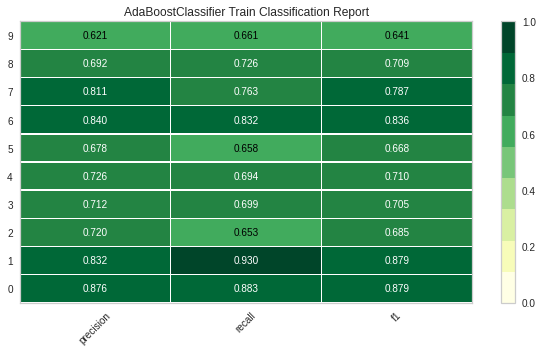

AdaBoostClassifier Test score: 0.7548754875487549
AdaBoostClassifier Test Classification Report
precision {0: 0.8627838104639685, 1: 0.8396150761828388, 2: 0.7270718232044199, 3: 0.7274549098196392, 4: 0.753177966101695, 5: 0.6865853658536586, 6: 0.8264550264550264, 7: 0.8152400835073069, 8: 0.6474358974358975, 9: 0.6499535747446611}
recall {0: 0.8918367346938776, 1: 0.9224669603524229, 2: 0.6375968992248062, 3: 0.7188118811881188, 4: 0.7240325865580448, 5: 0.6311659192825112, 6: 0.8152400835073069, 7: 0.7604673807205453, 8: 0.7258726899383984, 9: 0.6937561942517344}
f1 {0: 0.8770697441043653, 1: 0.8790931989924433, 2: 0.6794011357769747, 3: 0.7231075697211156, 4: 0.7383177570093458, 5: 0.6577102803738318, 6: 0.8208092485549133, 7: 0.7869017632241815, 8: 0.6844143272023233, 9: 0.6711409395973155}


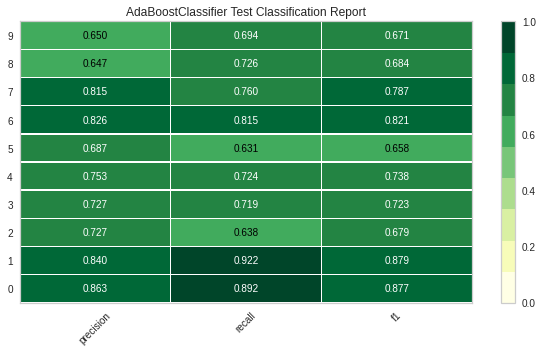

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



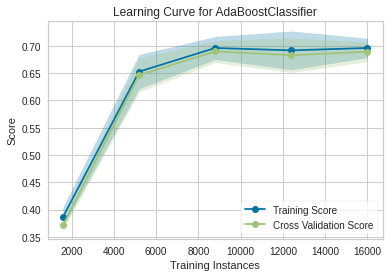

SVC Train score: 0.9831991599579979
SVC Train Classification Report
precision {0: 0.9949057564951604, 1: 0.9840283939662822, 2: 0.9820089955022488, 3: 0.9765702891326022, 4: 0.9773312725399279, 5: 0.984650369528141, 6: 0.9945919370698132, 7: 0.9825389334591789, 8: 0.9776623376623377, 9: 0.9774661992989484}
recall {0: 0.9954128440366973, 1: 0.9888542131074454, 2: 0.9879336349924586, 3: 0.9693221177634834, 4: 0.985966735966736, 5: 0.9835320840431573, 6: 0.992639842983317, 7: 0.9793038570084666, 8: 0.9843096234309623, 9: 0.9649036085022245}
f1 {0: 0.9951592356687898, 1: 0.986435401378697, 2: 0.9849624060150376, 3: 0.9729327042463373, 4: 0.9816300129366107, 5: 0.9840909090909091, 6: 0.9936149312377212, 7: 0.9809187279151944, 8: 0.980974719833203, 9: 0.9711442786069652}


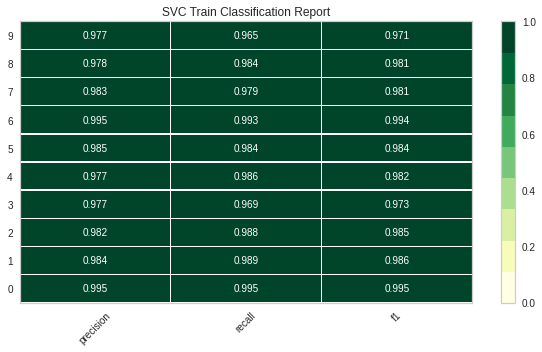

SVC Test score: 0.9532953295329533
SVC Test Classification Report
precision {0: 0.9726443768996961, 1: 0.9816433566433567, 2: 0.9369627507163324, 3: 0.9530469530469531, 4: 0.9551478083588175, 5: 0.9567198177676538, 6: 0.9637305699481865, 7: 0.9091760299625468, 8: 0.9515279241306639, 9: 0.9530132788559755}
recall {0: 0.9795918367346939, 1: 0.9894273127753304, 2: 0.9505813953488372, 3: 0.9445544554455445, 4: 0.9541751527494908, 5: 0.9417040358744395, 6: 0.9707724425887265, 7: 0.9454722492697176, 8: 0.9271047227926078, 9: 0.9246778989098117}
f1 {0: 0.9761057447890189, 1: 0.9855199648968846, 2: 0.9437229437229437, 3: 0.9487817006464446, 4: 0.954661232806928, 5: 0.9491525423728815, 6: 0.9672386895475819, 7: 0.9269689737470167, 8: 0.9391575663026521, 9: 0.9386317907444668}


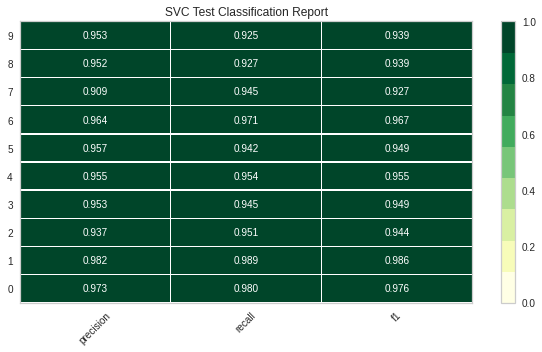

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



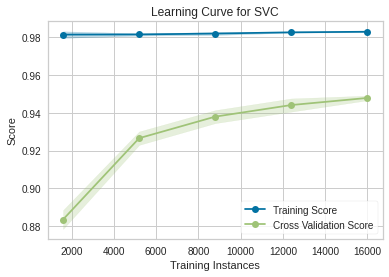

SVC Train score: 0.9991499574978749
SVC Train Classification Report
precision {0: 1.0, 1: 1.0, 2: 1.0, 3: 0.998019801980198, 4: 0.9994805194805195, 5: 0.9982964224872232, 6: 1.0, 7: 0.9976514795678723, 8: 0.9989545216936748, 9: 0.9990094105993066}
recall {0: 1.0, 1: 1.0, 2: 1.0, 3: 0.9975259772389906, 4: 1.0, 5: 0.9982964224872232, 6: 1.0, 7: 0.9990592662276576, 8: 0.9994769874476988, 9: 0.9970341077607514}
f1 {0: 1.0, 1: 1.0, 2: 1.0, 3: 0.997772828507795, 4: 0.9997401922577293, 5: 0.9982964224872232, 6: 1.0, 7: 0.9983548766157462, 8: 0.9992156862745097, 9: 0.9980207817911926}


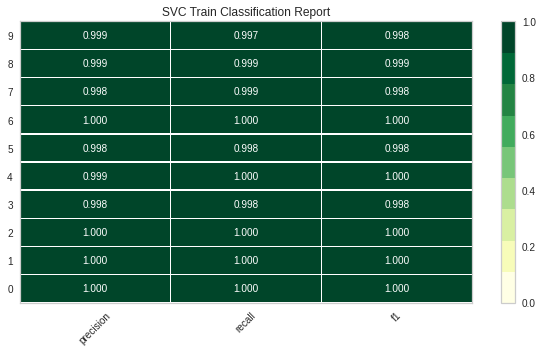

SVC Test score: 0.9177917791779178
SVC Test Classification Report
precision {0: 0.9426310583580614, 1: 0.959656652360515, 2: 0.8946360153256705, 3: 0.8495327102803738, 4: 0.9077526987242395, 5: 0.8976470588235295, 6: 0.9519331243469175, 7: 0.933531746031746, 8: 0.9222222222222223, 9: 0.9158974358974359}
recall {0: 0.9724489795918367, 1: 0.9850220264317181, 2: 0.9050387596899225, 3: 0.9, 4: 0.9419551934826884, 5: 0.8553811659192825, 6: 0.9509394572025052, 7: 0.9162609542356378, 8: 0.8521560574948666, 9: 0.8850346878097126}
f1 {0: 0.9573078854846812, 1: 0.9721739130434782, 2: 0.8998073217726397, 3: 0.8740384615384614, 4: 0.9245377311344328, 5: 0.876004592422503, 6: 0.9514360313315926, 7: 0.9248157248157248, 8: 0.8858057630736393, 9: 0.9002016129032258}


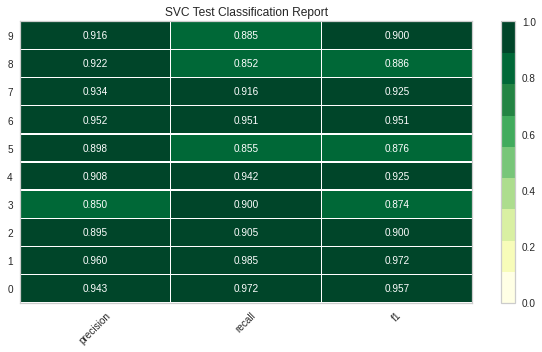

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



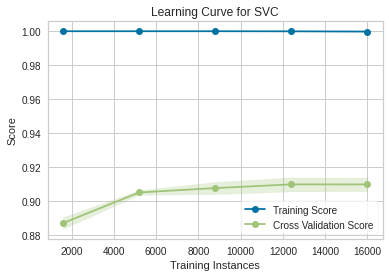

KNeighborsClassifier Train score: 0.9615480774038702
KNeighborsClassifier Train Classification Report
precision {0: 0.9647992067426872, 1: 0.9611231101511879, 2: 0.9584599797365755, 3: 0.9474708171206225, 4: 0.9602302459445317, 5: 0.9599083619702177, 6: 0.9789628180039139, 7: 0.9607565011820332, 8: 0.9843312814773363, 9: 0.9419862340216323}
recall {0: 0.9918450560652395, 1: 0.9919750334373607, 2: 0.9512317747611865, 3: 0.9638792676892627, 4: 0.9537422037422038, 5: 0.9517319704713231, 6: 0.9818449460255152, 7: 0.955785512699906, 8: 0.9199790794979079, 9: 0.9471082550667326}
f1 {0: 0.9781352098517214, 1: 0.976305397103993, 2: 0.9548321978299268, 3: 0.9556046112337503, 4: 0.9569752281616688, 5: 0.9558026803535786, 6: 0.9804017638412544, 7: 0.9582645602452252, 8: 0.9510678561773452, 9: 0.9445403007148139}


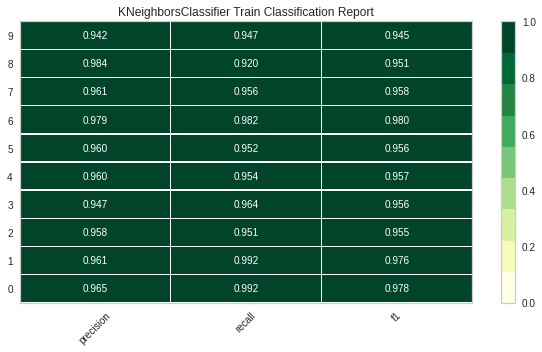

KNeighborsClassifier Test score: 0.930993099309931
KNeighborsClassifier Test Classification Report
precision {0: 0.9358600583090378, 1: 0.9423076923076923, 2: 0.9452332657200812, 3: 0.9011406844106464, 4: 0.9350785340314136, 5: 0.925, 6: 0.952626158599382, 7: 0.9241379310344827, 8: 0.9555061179087876, 9: 0.8956692913385826}
recall {0: 0.9826530612244898, 1: 0.9929515418502203, 2: 0.9031007751937985, 3: 0.9386138613861386, 4: 0.9093686354378818, 5: 0.9125560538116592, 6: 0.965553235908142, 7: 0.9133398247322297, 8: 0.8819301848049281, 9: 0.9018830525272548}
f1 {0: 0.9586859133897462, 1: 0.966966966966967, 2: 0.9236868186323092, 3: 0.9194956353055286, 4: 0.9220443985544657, 5: 0.9187358916478555, 6: 0.9590461378952825, 7: 0.9187071498530851, 8: 0.9172450613988254, 9: 0.8987654320987655}


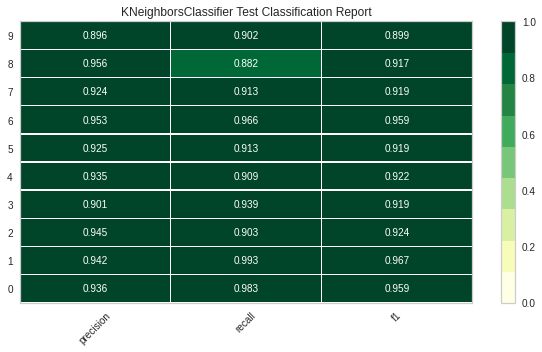

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



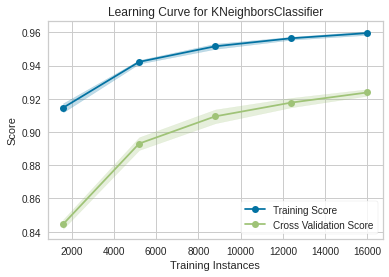

KNeighborsClassifier Train score: 0.9541977098854942
KNeighborsClassifier Train Classification Report
precision {0: 0.9577187807276303, 1: 0.947726306842329, 2: 0.9582697201017811, 3: 0.9346468044209515, 4: 0.9482936918304034, 5: 0.9439679817038308, 6: 0.9773175542406312, 7: 0.9450139794967382, 8: 0.9834285714285714, 9: 0.9499744767738643}
recall {0: 0.9928644240570846, 1: 0.9942041908158716, 2: 0.9467068878833584, 3: 0.9623948540326571, 4: 0.9532224532224532, 5: 0.9375354911981828, 6: 0.97252208047105, 7: 0.9539040451552211, 8: 0.9001046025104602, 9: 0.9199209095402867}
f1 {0: 0.974974974974975, 1: 0.9704090513489991, 2: 0.9524532119372787, 3: 0.9483178937103851, 4: 0.9507516848107829, 5: 0.9407407407407408, 6: 0.9749139203148056, 7: 0.949438202247191, 8: 0.9399235390496996, 9: 0.9347061778001005}


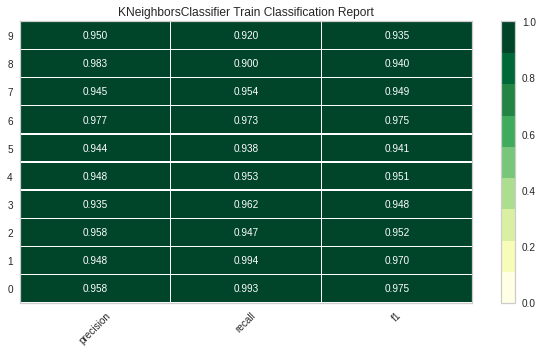

KNeighborsClassifier Test score: 0.9277927792779278
KNeighborsClassifier Test Classification Report
precision {0: 0.9285714285714286, 1: 0.9391666666666667, 2: 0.9521384928716904, 3: 0.8946877912395154, 4: 0.9282051282051282, 5: 0.9153318077803204, 6: 0.9552083333333333, 7: 0.9056785370548605, 8: 0.9549041713641488, 9: 0.9075025693730729}
recall {0: 0.9816326530612245, 1: 0.9929515418502203, 2: 0.9060077519379846, 3: 0.9504950495049505, 4: 0.9215885947046843, 5: 0.8968609865470852, 6: 0.9572025052192067, 7: 0.9162609542356378, 8: 0.8696098562628337, 9: 0.8751238850346879}
f1 {0: 0.9543650793650794, 1: 0.9653104925053534, 2: 0.9285004965243298, 3: 0.9217474795967354, 4: 0.9248850281042412, 5: 0.9060022650056625, 6: 0.9562043795620437, 7: 0.9109390125847048, 8: 0.9102632993014508, 9: 0.8910191725529768}


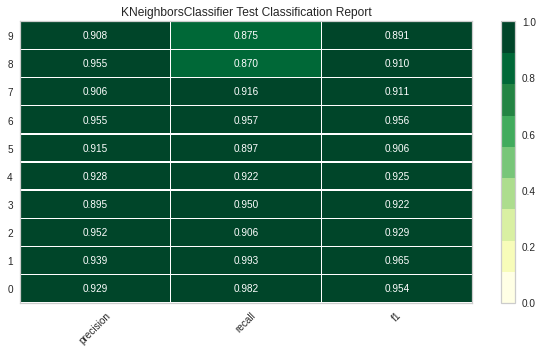

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



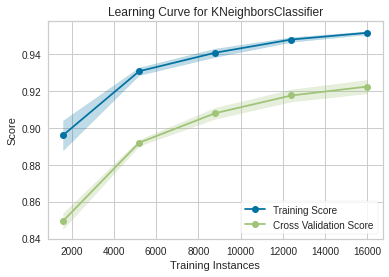

In [41]:
# Create numerical_transformer and categorical_transformer
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

# Use ColumnTransformer by selecting column by names
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
models = [DecisionTreeClassifier(),
          DecisionTreeClassifier(max_depth = 10)
          MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state = 1),
          AdaBoostClassifier(),
          SVC(kernel='rbf'),
          SVC(kernel='linear'),
          KNeighborsClassifier(n_neighbors = 3),
          KNeighborsClassifier(n_neighbors = 4)]

def score_model(X_train, y_train, X_test, y_test, model):
    clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])
    model_name = type(model).__name__

    train_graph_title = model_name + " Train Classification Report"
    visualizer = ClassificationReport(clf, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cmap="YlGn", size=(600, 360), title = train_graph_title)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_train, y_train)
    train_score = visualizer.score_
    print(model_name + " Train score: " + str(train_score))
    print(model_name + " Train Classification Report")
    classification_train_scores = visualizer.scores_
    for score_type in classification_train_scores:
        print(score_type, end = ' ')
        print(classification_train_scores[score_type])
    a = visualizer.poof()

    test_graph_title = model_name + " Test Classification Report"
    visualizer = ClassificationReport(clf, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cmap="YlGn", size=(600, 360), title = test_graph_title)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    test_score = visualizer.score_
    print(model_name + " Test score: " + str(test_score))
    print(model_name + " Test Classification Report")
    classification_test_scores = visualizer.scores_
    for score_type in classification_test_scores:
        print(score_type, end = ' ')
        print(classification_test_scores[score_type])
    g = visualizer.poof()

    learning_curve_title = model_name + " Learning Curve"
    visualizer = LearningCurve(clf, scoring = 'f1_weighted', n_jobs = 4)
    visualizer.fit(X_train, y_train)
    g = visualizer.poof()

for model in models:
    score_model(X_train, y_train, X_test, y_test, model)